# Business Case: LoanTap Logistic Regression

## About LoanTap
* LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

* The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

* LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
    1. Personal Loan
    2. EMI Free Loan
    3. Personal Overdraft
    4. Advance Salary Loan
* This case study will focus on the underwriting process behind Personal Loan only

## Column Profiling:
1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

## Problem Statement:

* Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# Analysing basic metrics

In [1]:
#importing different libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
#Loading of dataset
df = pd.read_csv("../scaler/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.shape #to observe shape of data

(396030, 27)

* Dataset is of 39630 rows and 27 attributes.

In [4]:
df.info() #to observe the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Checking Column Datatypes

In [5]:
# Non-numeric columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [6]:
# Convert pub_rec and pub_rec_bankruptcies to categorical variables
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0,'yes','no')
df['pub_rec'] = np.where(df['pub_rec']>0,'yes','no')
df[['pub_rec_bankruptcies','pub_rec']] = df[['pub_rec_bankruptcies','pub_rec']].astype('category')

In [7]:
# Convert earliest credit line & issue date to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [8]:
#Convert employment length to numeric
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length']=df['emp_length'].replace(d)

In [9]:
#Convert columns with less number of unique values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

In [11]:
df.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc
count,396030.000000,396030.000000,396030.000000,377729.000000,3.960300e+05,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000
mean,14113.888089,13.639400,431.849698,5.938578,7.420318e+04,17.379514,11.311153,1.584454e+04,53.791749,25.414744,1.813991
std,8357.441341,4.472157,250.727790,3.645623,6.163762e+04,18.019092,5.137649,2.059184e+04,24.452193,11.886991,2.147930
min,500.000000,5.320000,16.080000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,8000.000000,10.490000,250.330000,3.000000,4.500000e+04,11.280000,8.000000,6.025000e+03,35.800000,17.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.000000,6.400000e+04,16.910000,10.000000,1.118100e+04,54.800000,24.000000,1.000000
75%,20000.000000,16.490000,567.300000,10.000000,9.000000e+04,22.980000,14.000000,1.962000e+04,72.900000,32.000000,3.000000
max,40000.000000,30.990000,1533.810000,10.000000,8.706582e+06,9999.000000,90.000000,1.743266e+06,892.300000,151.000000,34.000000


* There is significant difference found in the mean and median of the following attributes
    1. loan_amnt
    2. terms
    3. installment
    4. revol_bal etc.
* These attributes might contain outliers

In [12]:
df.describe(include = 'object')

,emp_title,title,address
count,373103,394275,396030
unique,173105,48817,393700
top,Teacher,Debt consolidation,USCGC Smith\r\nFPO AE 70466
freq,4389,152472,8


### Conclusion:
* Most of the loan disburesed for the 36 months period
* Most of the loan applicant have mortgage the home
* Majority of loans been fully paid off
* Majorily the loans been disbursed for the purpose of debt consolidation
* Most of the applicant is Individual

## Check for Duplicate Values

In [13]:
df.duplicated().sum()

0

* There are no duplicate instances in the data

In [14]:
# Handling Missing Values
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies        0
address                     0
dtype: int64

* We have bunch of missing value attributes.

In [15]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [16]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [17]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [20]:
df.shape

(377464, 27)

## Non-Graphical Analysis

In [21]:
# unique value term column(listed in %)
term = df['term'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
term.columns = ['term', 'Count']
term

,term,Count
0,36 months,75.8
1,60 months,24.2


In [22]:
# unique value grade column(listed in %)
grade = df['grade'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
grade.columns = ['grade', 'Count']
grade

,grade,Count
0,B,29.33
1,C,26.72
2,A,16.28
3,D,15.95
4,E,7.95
5,F,2.99
6,G,0.77


In [23]:
# unique value sub_grade column(listed in %)
sub_grade = df['sub_grade'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
sub_grade.columns = ['sub_grade', 'Count']
sub_grade

,sub_grade,Count
0,B3,6.75
1,B4,6.48
2,C1,5.97
3,C2,5.70
4,B2,5.69
5,B5,5.57
6,C3,5.34
7,C4,5.11
8,B1,4.84
9,A5,4.72


In [24]:
# unique value emp_title column(listed in %)
emp_title = df['emp_title'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
emp_title.columns = ['emp_title', 'Count']
emp_title

,emp_title,Count
0,Unknown,1.27
1,Teacher,1.16
2,Manager,1.13
3,Registered Nurse,0.49
4,RN,0.49
...,...,...
172900,Belanger,0.00
172901,OMIV Supervisor,0.00
172902,"SVP, Technology",0.00
172903,sikorsky,0.00


In [25]:
# unique value emp_length column(listed in %)
emp_length = df['emp_length'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
emp_length.columns = ['emp_length', 'Count']
emp_length

,emp_length,Count
0,10.0,33.37
1,2.0,9.49
2,0.0,8.40
3,3.0,8.38
4,5.0,7.01
5,1.0,6.85
6,4.0,6.34
7,6.0,5.52
8,7.0,5.51
9,8.0,5.07


In [26]:
# unique value home_ownership column(listed in %)
home_ownership = df['home_ownership'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
home_ownership.columns = ['home_ownership', 'Count']
home_ownership

,home_ownership,Count
0,MORTGAGE,50.24
1,RENT,40.63
2,OWN,9.09
3,OTHER,0.03
4,NONE,0.01
5,ANY,0.00


In [27]:
# unique value verification_status column(listed in %)
verification_status = df['verification_status'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
verification_status.columns = ['verification_status', 'Count']
verification_status

,verification_status,Count
0,Source Verified,33.83
1,Verified,33.52
2,Not Verified,32.65


In [28]:
# unique value loan_status column(listed in %)
loan_status = df['loan_status'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
loan_status.columns = ['loan_status', 'Count']
loan_status

,loan_status,Count
0,Fully Paid,80.77
1,Charged Off,19.23


In [29]:
# unique value purpose column(listed in %)
purpose = df['purpose'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
purpose.columns = ['purpose', 'Count']
purpose

,purpose,Count
0,debt_consolidation,59.45
1,credit_card,20.89
2,home_improvement,5.99
3,other,5.27
4,major_purchase,2.21
5,small_business,1.47
6,car,1.19
7,medical,1.03
8,moving,0.71
9,vacation,0.61


In [30]:
# unique value initial_list_status column(listed in %)
initial_list_status = df['initial_list_status'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
initial_list_status.columns = ['initial_list_status', 'Count']
initial_list_status

,initial_list_status,Count
0,f,60.17
1,w,39.83


In [31]:
# unique value application_type column(listed in %)
application_type = df['application_type'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
application_type.columns = ['application_type', 'Count']
application_type

,application_type,Count
0,INDIVIDUAL,99.83
1,JOINT,0.10
2,DIRECT_PAY,0.07


In [32]:
# Number of unique values in all columns
unique_num = ['loan_amnt','int_rate','installment','emp_title','annual_inc','issue_d','title','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','address']
for col in unique_num:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in loan_amnt: 1395
No. of unique values in int_rate: 566
No. of unique values in installment: 54570
No. of unique values in emp_title: 172905
No. of unique values in annual_inc: 24157
No. of unique values in issue_d: 115
No. of unique values in title: 47061
No. of unique values in dti: 4230
No. of unique values in earliest_cr_line: 665
No. of unique values in open_acc: 60
No. of unique values in pub_rec: 2
No. of unique values in revol_bal: 55108
No. of unique values in revol_util: 1221
No. of unique values in total_acc: 118
No. of unique values in mort_acc: 33
No. of unique values in pub_rec_bankruptcies: 2
No. of unique values in address: 375337


In [33]:
df.describe().loc[['min', 'max']]

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc
min,500.0,5.32,16.08,0.0,4000.0,0.00,1.0,0.0,0.0,2.0,0.0
max,40000.0,30.99,1533.81,10.0,8706582.0,380.53,90.0,1743266.0,892.3,151.0,34.0


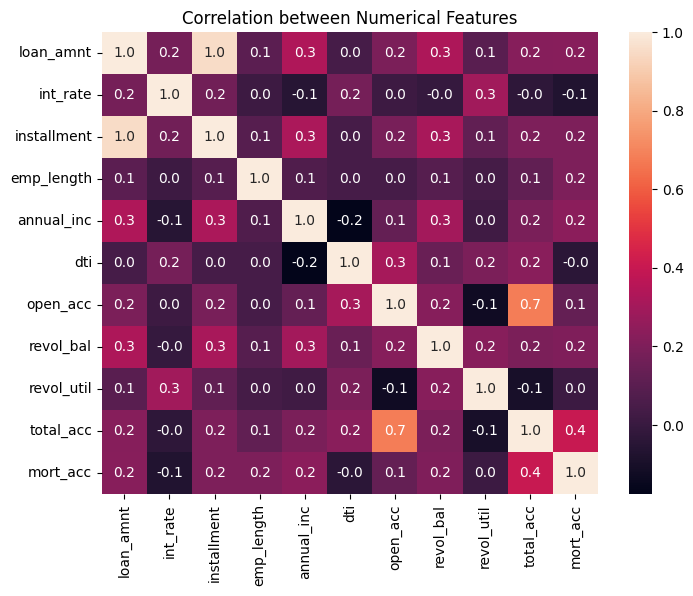

In [34]:
#Correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('Correlation between Numerical Features')
plt.show()

* loan_amnt and installment are perfectly correlated
* total_acc is highly correlated with open_acc
* total_acc is moderately correlated with mort_acc
* We can remove some of these correlated features to avoid multicolinearity

## Univariate Analysis

In [35]:
#Drop installment
df.drop(columns=['installment'], inplace=True)

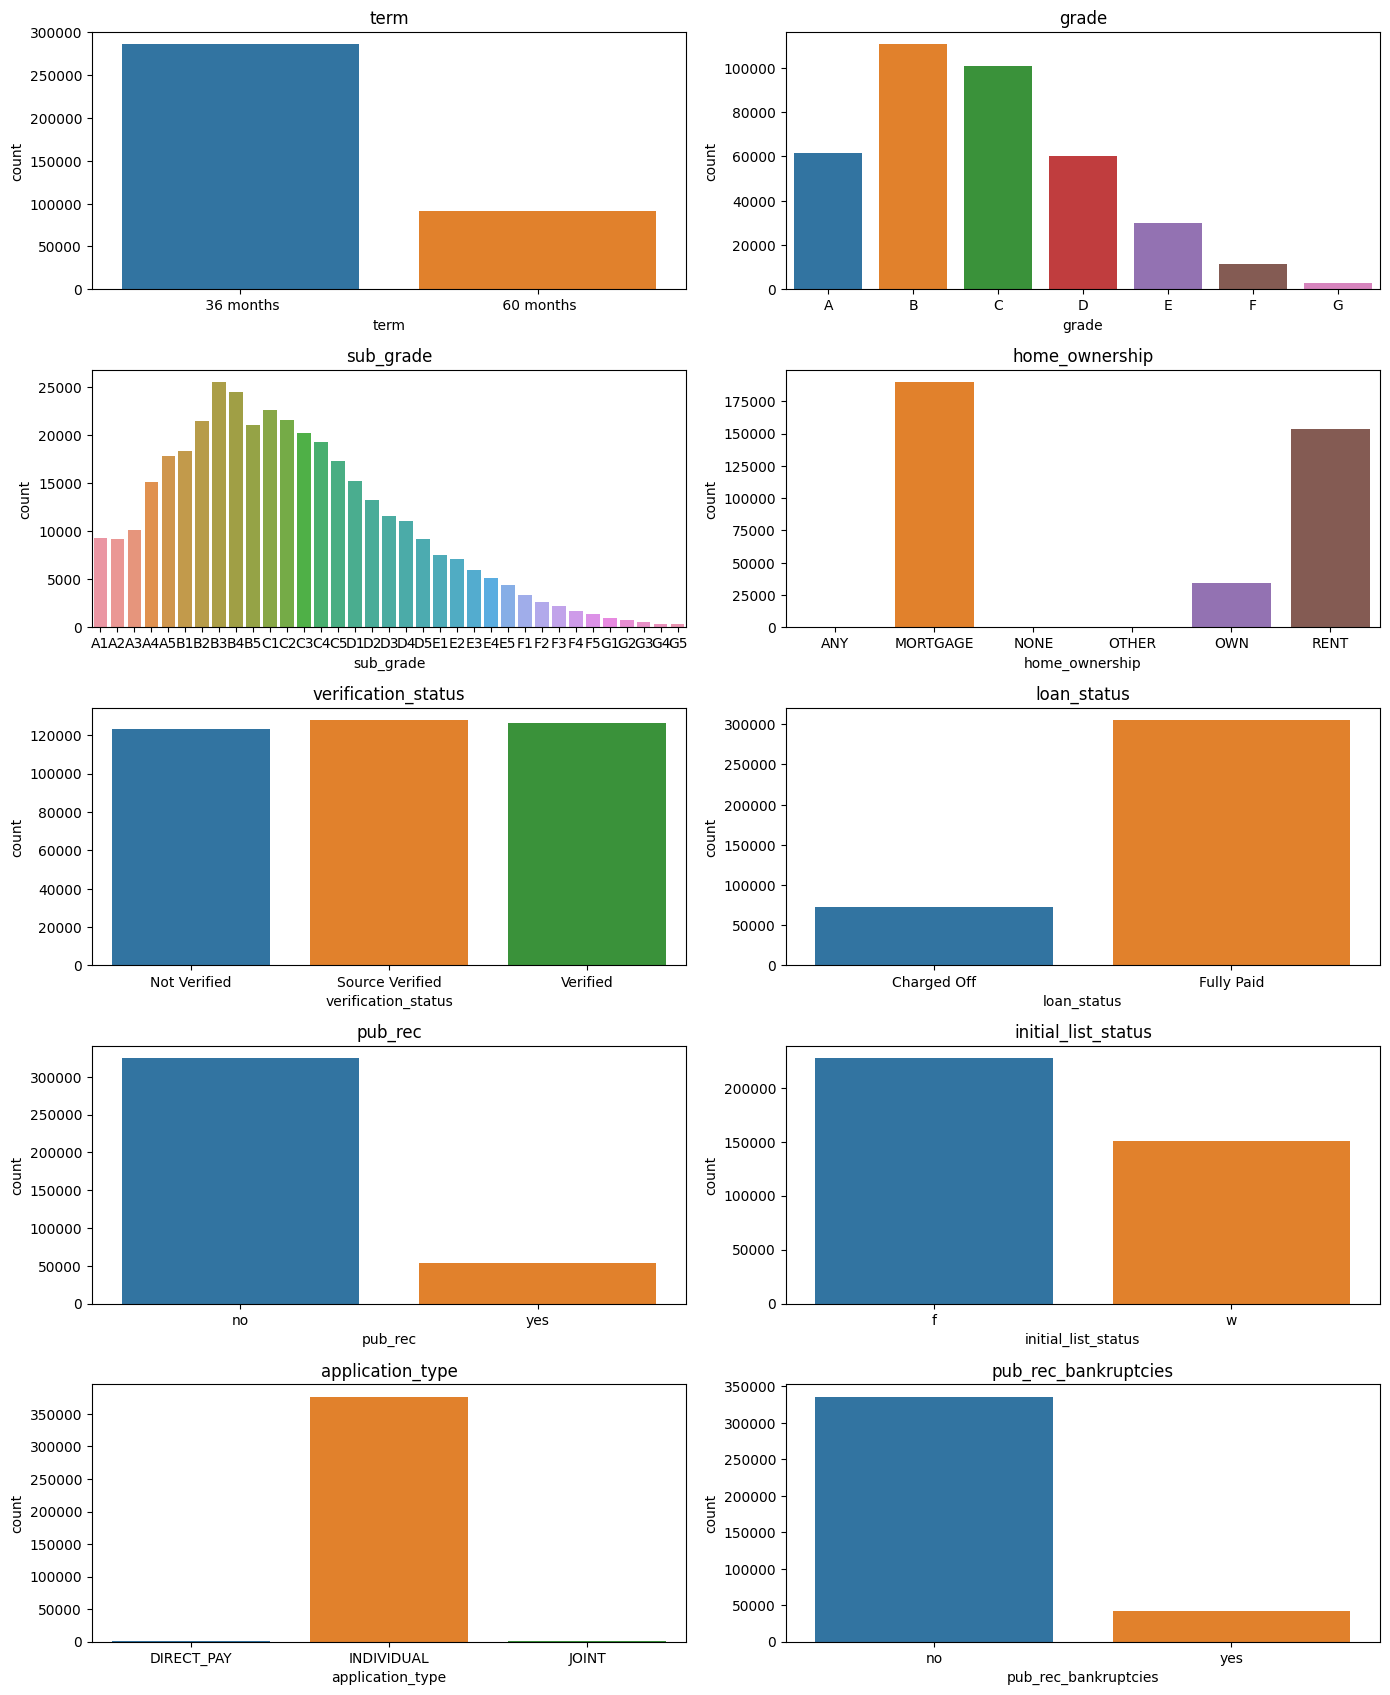

In [36]:
#Distribution of categorical variables
plot = ['term', 'grade', 'sub_grade' , 'home_ownership', 'verification_status',
       'loan_status','pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))
i=1
for col in plot:
  ax=plt.subplot(6,2,i)
  sns.countplot(x=df[col])
  plt.title(f'{col}')
  i += 1

plt.tight_layout()
plt.show()

* Almost 80% loans are of 36 months term
* Maximum loans (30%) fall in B grade, followed by C,A & D respectively
* The type of home ownership for 50% cases is mortgage
* The target variable (loan status) is imbalanced in the favour of fully-paid loans. Defaulters are approx 25% of fully paid instances.
* 85% of applicants don't have a public record/haven't filled for bankruptcy
* 99% applicants have applied under 'individual' application type

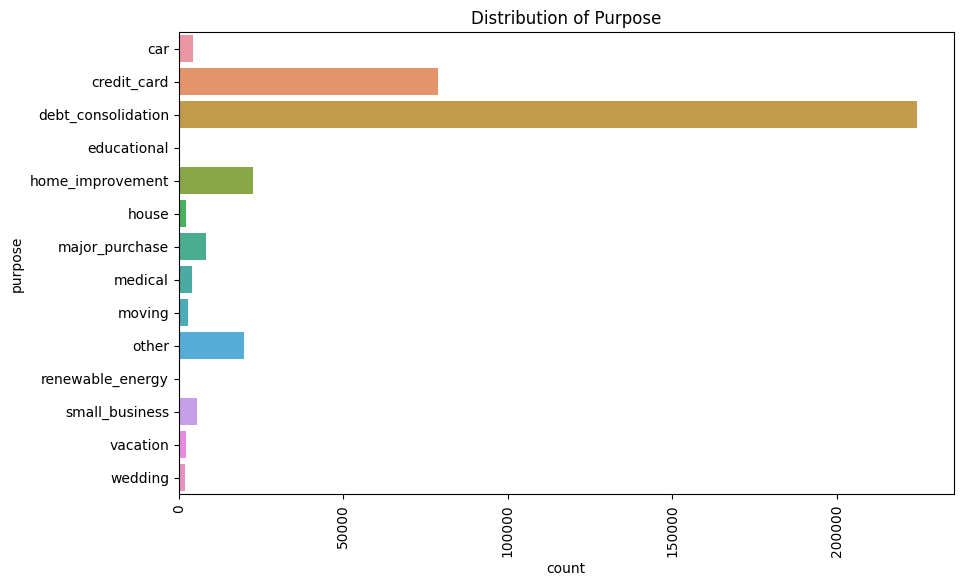

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['purpose'])
plt.xticks(rotation=90)
plt.title('Distribution of Purpose')
plt.show()

* 55% of loans are taken for the purpose of debt consolidation followed by 20% on credit card

## Outlier Detection

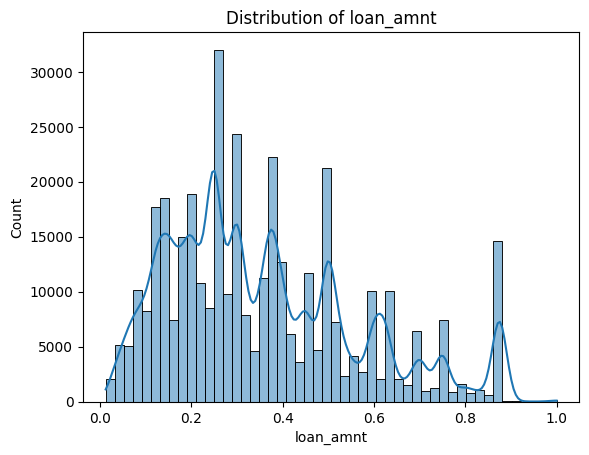

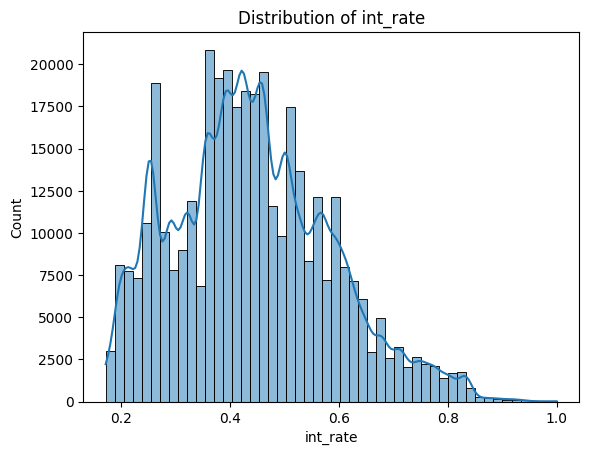

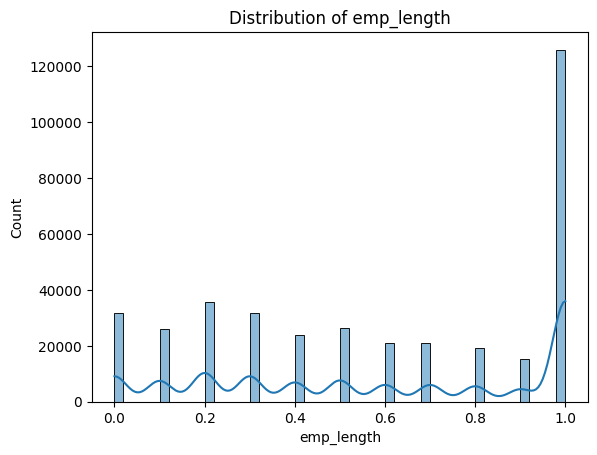

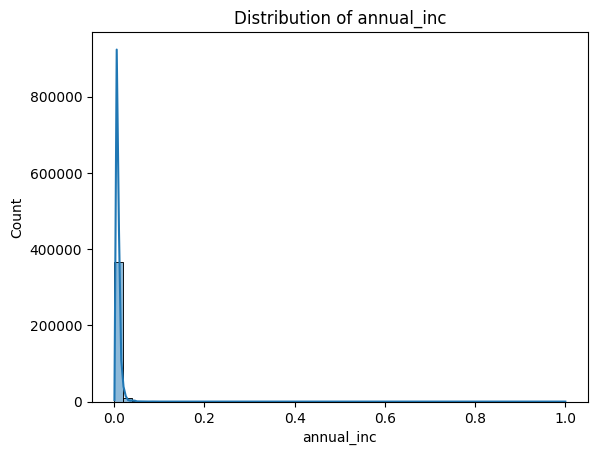

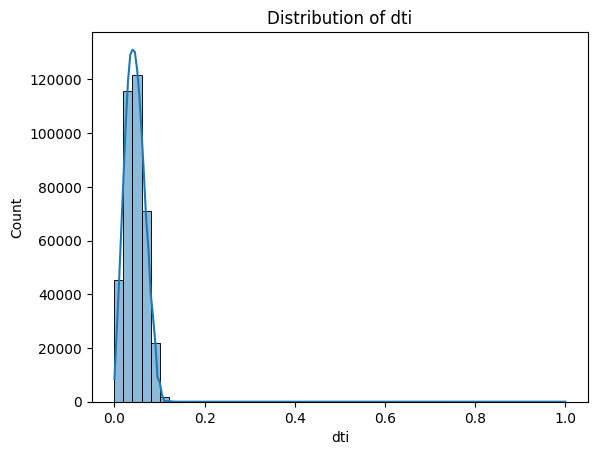

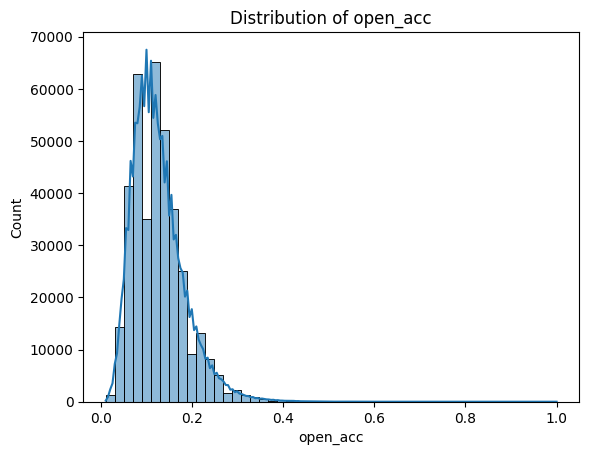

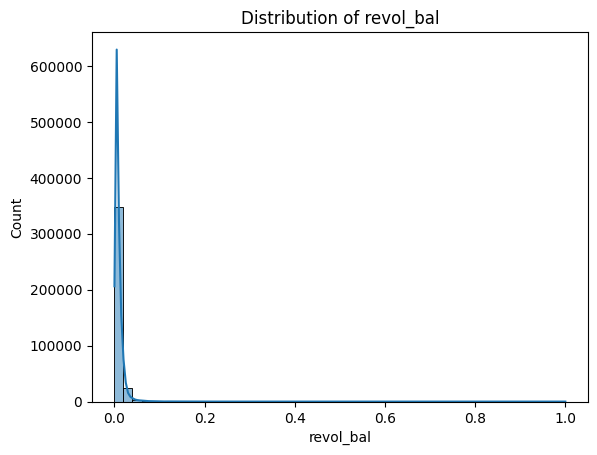

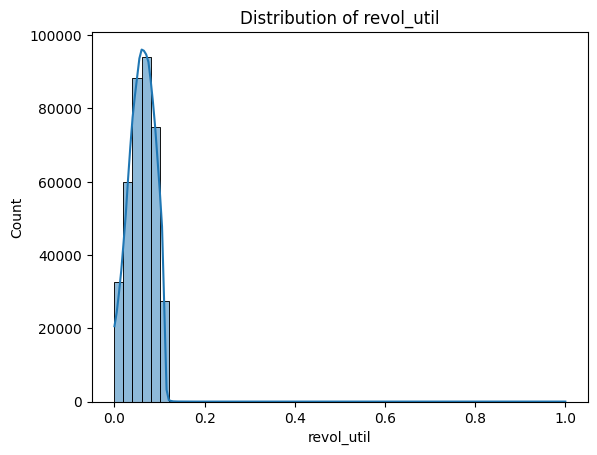

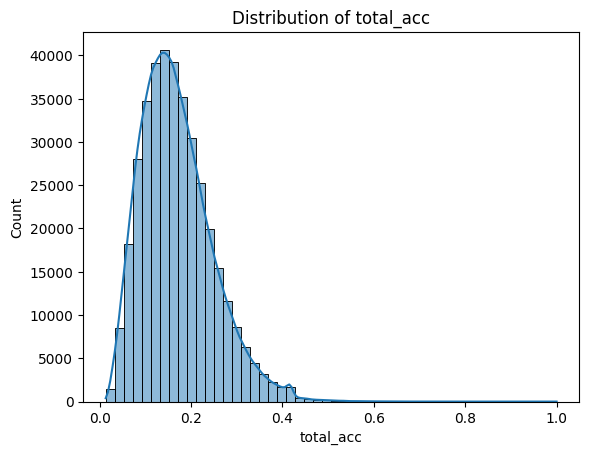

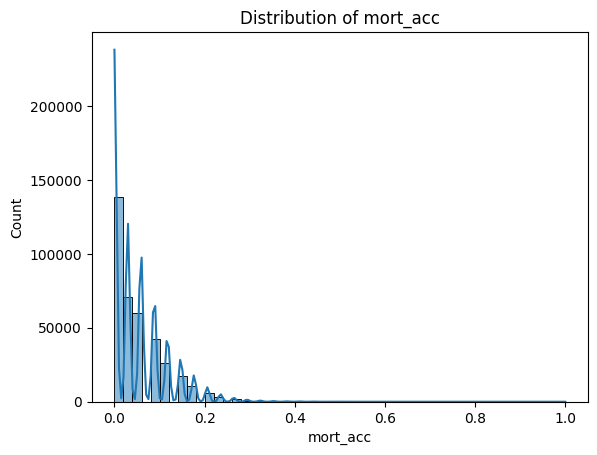

In [38]:
#Distribution of numerical variables
num_vars = df.select_dtypes('float64').columns.tolist()
for i in num_vars:
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True, bins=50)
    plt.show()

* Most of the distribution is highly skewed which tells us that they might contain outliers
* Almost all the continuous features have outliers present in the dataset.

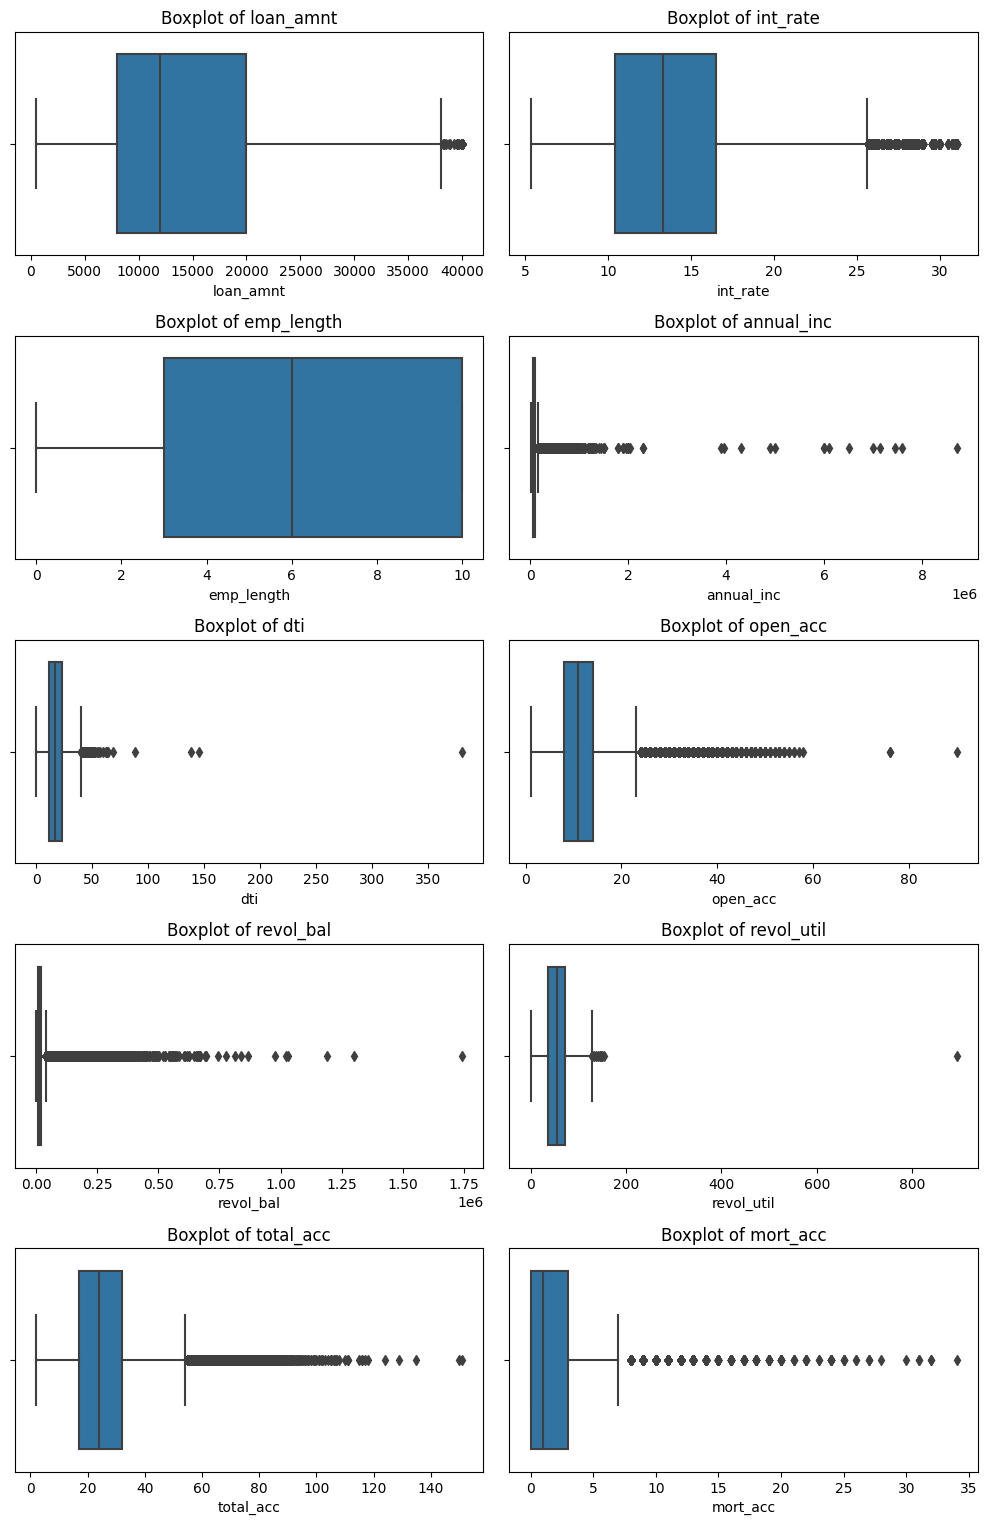

In [39]:
fig = plt.figure(figsize=(10,21))
i=1
for col in num_vars:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

* Here we can see that many columns have outliers. Lets remove the rows with outliers using standard deviation (99% data is within 3 standard deviations in case of normally distributed data).
* For pub_Rec and pub_rec_bankruptcies, we can apply the 0 or 1 approach

### Outlier Treatment

In [40]:
# Numeric columns after converting public records to category
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

In [41]:
#Removing outliers using standard deviation
for col in num_cols:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]

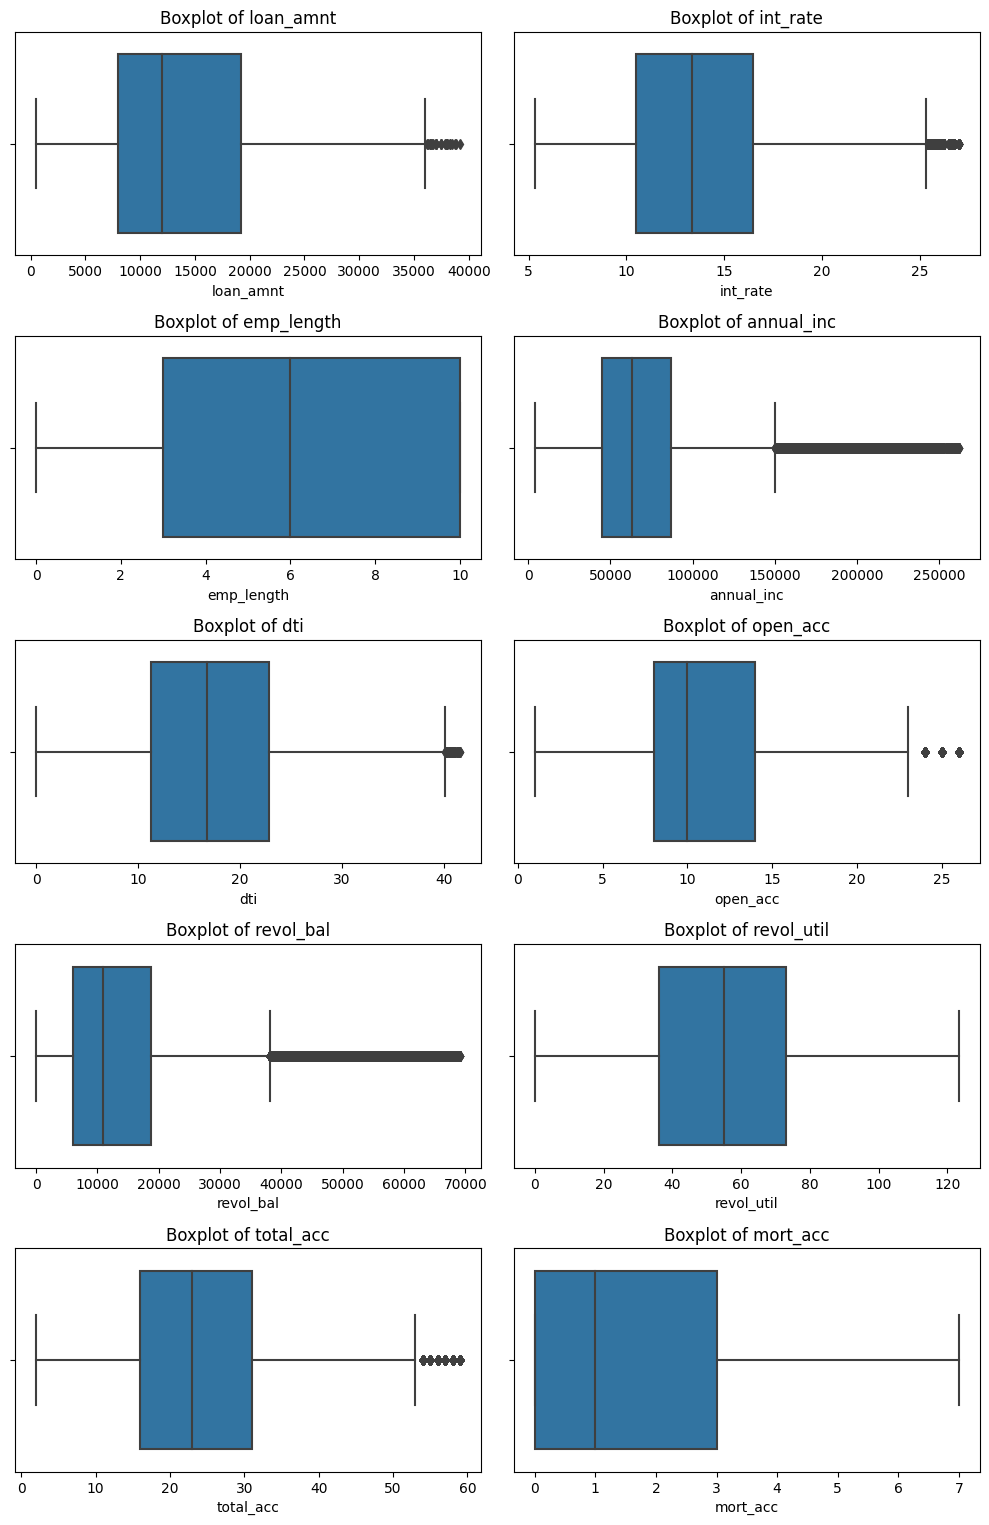

In [42]:
fig = plt.figure(figsize=(10,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

## Bivariate Analysis

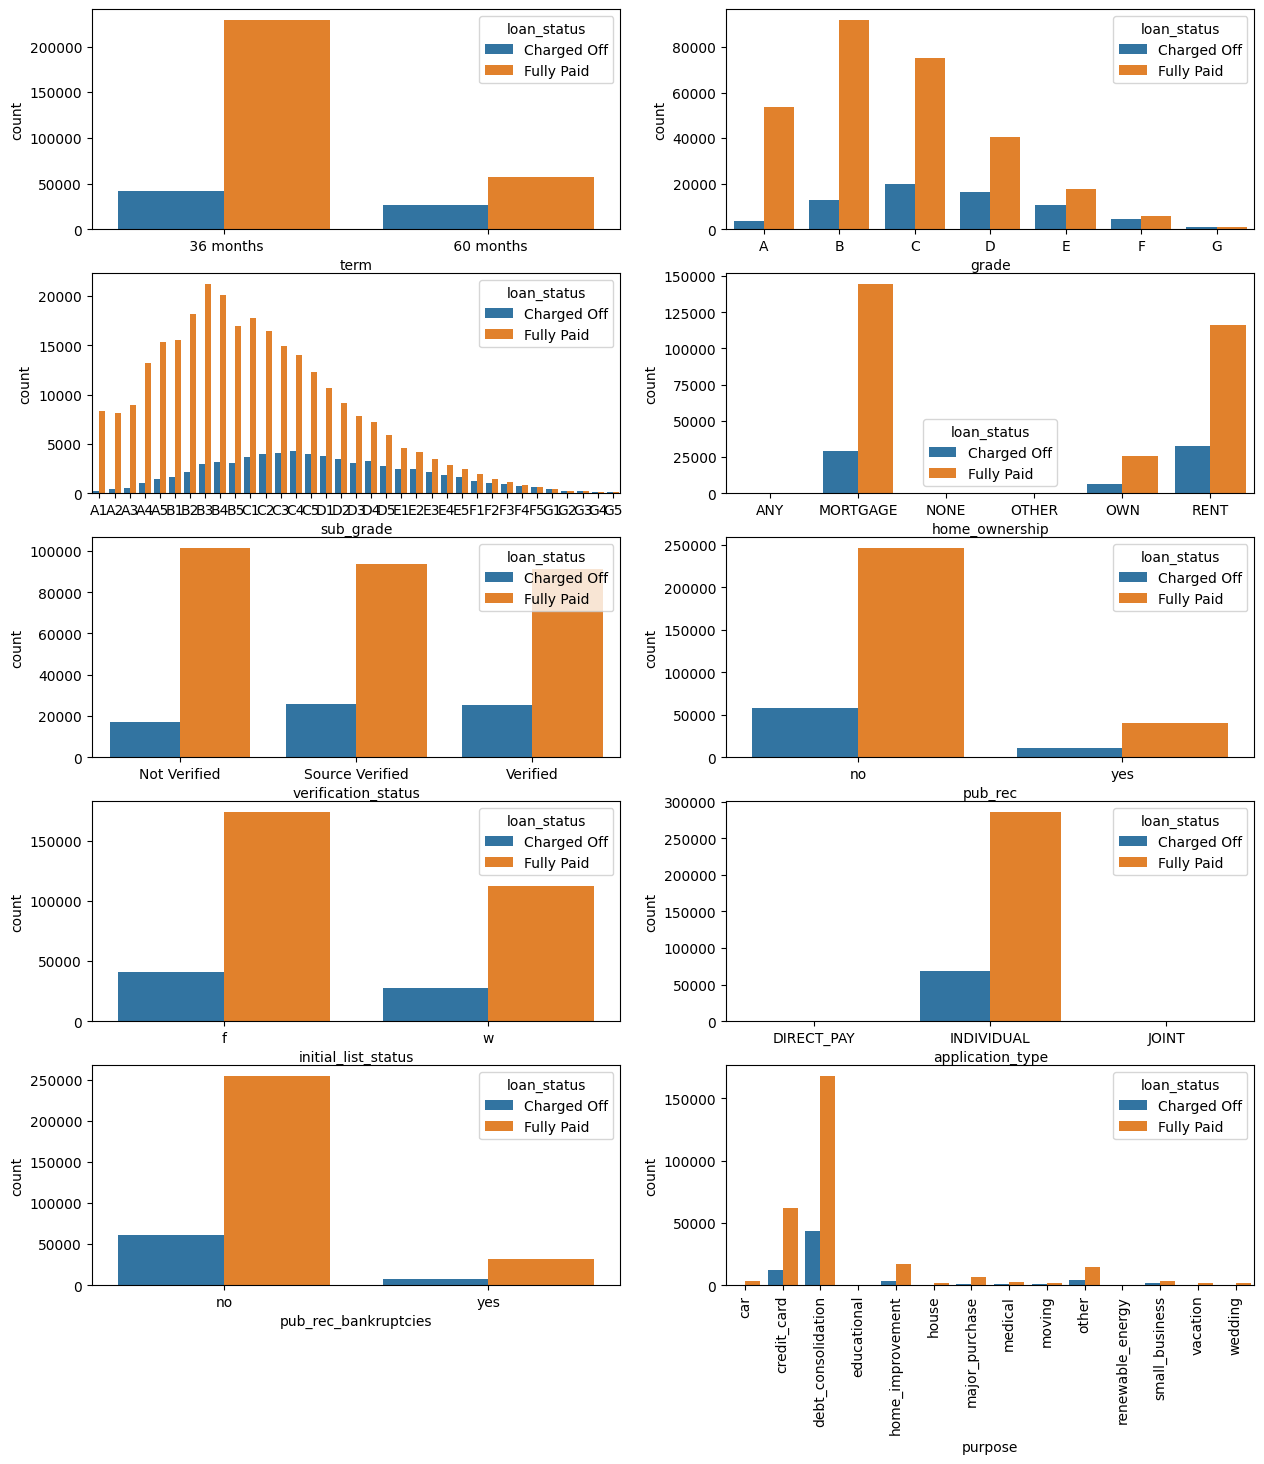

In [43]:
plt.figure(figsize=(15,20))

plt.subplot(6,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='grade',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='sub_grade',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(6,2,6)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,7)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,8)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,9)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.subplot(6,2,10)
g = sns.countplot(x='purpose',data=df,hue='loan_status')

g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

* The % of defaulters is much higher for longer (60-month) term
* Most of people have home ownership as mortgage and rent
* The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.
* So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan
* Individual application type has higher default rate compared to Direct pay/joint
* Most of the people took loan for debt consolidations

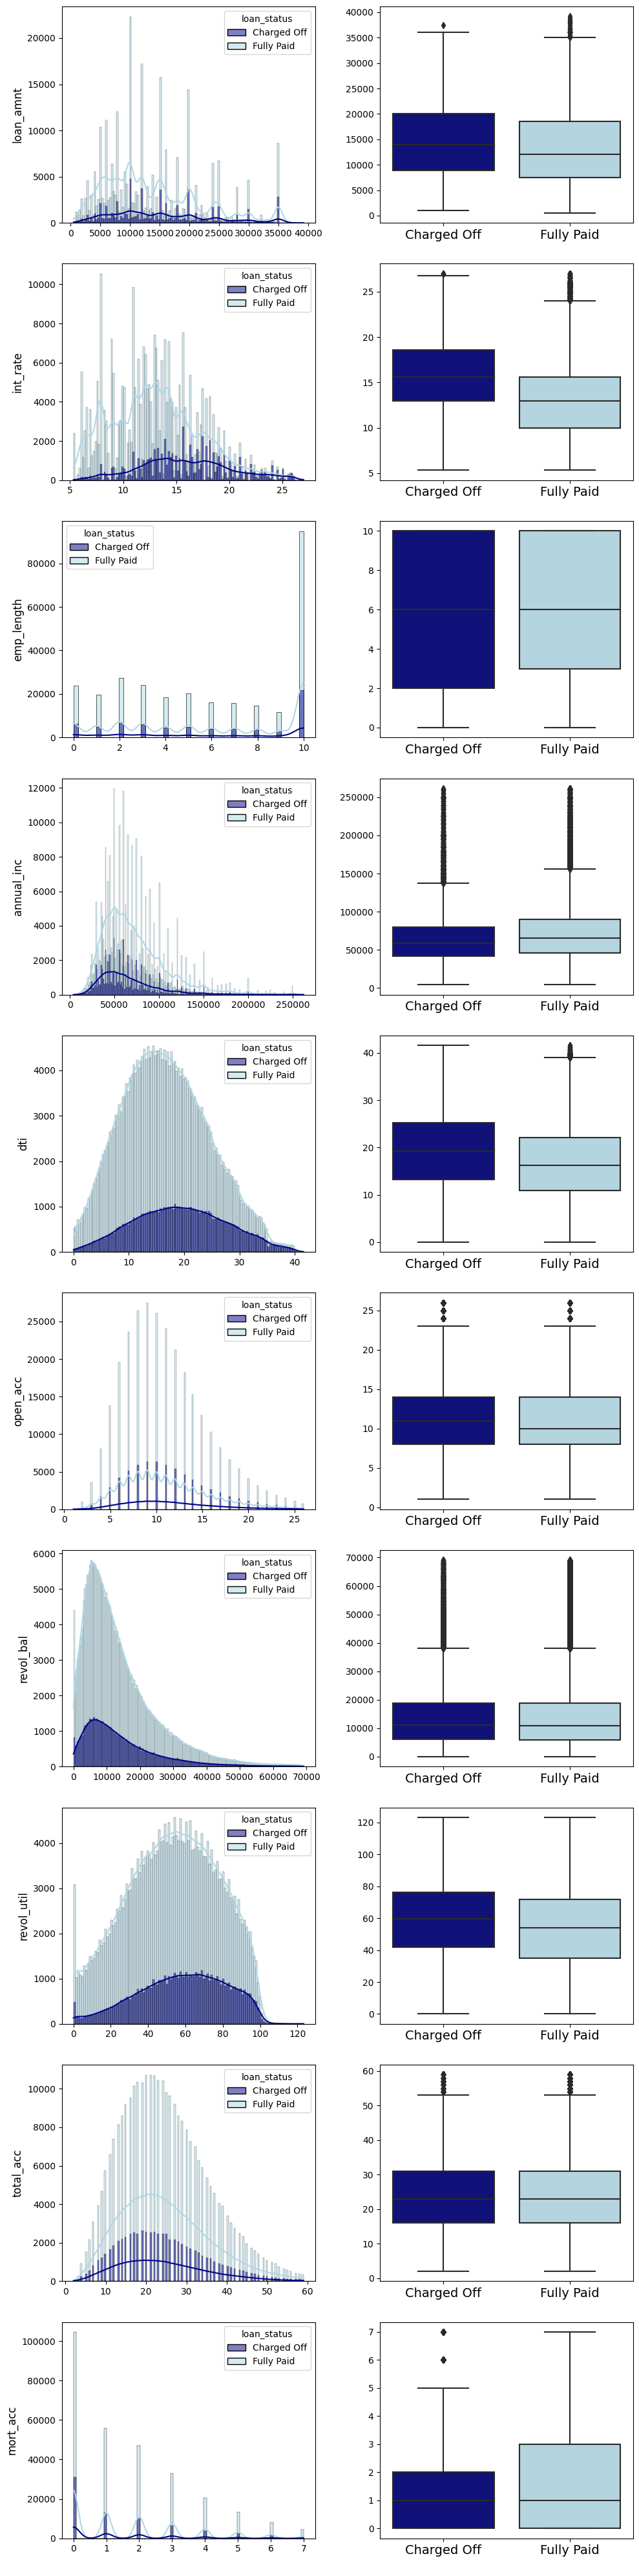

In [44]:
# Impact of numerical features on loan_status
num_cols = df.select_dtypes(include='number').columns

fig, ax = plt.subplots(10,2,figsize=(10,40))
i=0
color_dict = {'Fully Paid': matplotlib.colors.to_rgba('#add8e6', 0.5),
              'Charged Off': matplotlib.colors.to_rgba('#00008b', 1)}
for col in num_cols:
    sns.histplot(data=df, x=col, hue='loan_status', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=df, y=col, x='loan_status', ax=ax[i,1],
               palette=('#00008b', '#add8e6'))
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

* From the boxplots, it can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are slightly higher for defaulters while annual income is lower
* Most the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

## Data Pre-Processing
#### Feature Engineering

In [45]:
df['address'].sample(10)

86284     8538 Bonnie Shoals Suite 917\r\nLaneborough, W...
73450     001 Amy Meadows Suite 546\r\nAlyssachester, VA...
330536               85621 Wang Mills\r\nBarrfort, ME 30723
317748    7633 Carr Place Suite 386\r\nNorth Mathewport,...
339697    853 Peter Squares Suite 430\r\nSuzannetown, IN...
161643                   Unit 9538 Box 7420\r\nDPO AP 70466
294831    3106 Randall Coves Suite 413\r\nCobbborough, T...
206421           5484 Mata Corners\r\nEast Alicia, KS 48052
190041     9603 Nixon Mountains\r\nLake Lisaville, NE 48052
19                       Unit 8386 Box 5821\r\nDPO AE 05113
Name: address, dtype: object

In [46]:
# Deriving zip code and state from address
df[['state', 'zip_code']] = df['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [47]:
#Drop address
df.drop(["address"], axis = 1, inplace=True)

In [48]:
df.zip_code.nunique()

10

* There are only 10 zipcodes.

In [49]:
# Remove columns which do not have an impact on loan_status
df.drop(columns=['initial_list_status','state',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)

# Subgrade is removed because grade and subgrade are similar features

In [50]:
# Encoding Target Variable
df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [51]:
x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df['loan_status']
y.reset_index(drop=True, inplace=True)

In [52]:
# Encoding Binary features into numerical dtype
x['term']=x['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
x['pub_rec']=x['pub_rec'].map({'no': 0, 'yes':1}).astype(int)
x['pub_rec_bankruptcies']=x['pub_rec_bankruptcies'].map({'no': 0, 'yes':1}).astype(int)

## One Hot Encoding of Categorical Features

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score, precision_recall_curve,
                             precision_score, RocCurveDisplay, average_precision_score)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [54]:
cat_cols = x.select_dtypes('category').columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,0,36369.0,41.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,0,20131.0,53.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15600.0,36,10.49,0.0,43057.0,12.79,13.0,0,11987.0,92.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,0,5472.0,21.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,0,24584.0,69.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train-Test Split

In [55]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [56]:
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of x_train: (284250, 47)
Shape of x_test: (71063, 47)


In [57]:
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (284250,)
Shape of y_test: (71063,)


### Scaling Numeric Features

In [58]:
#Initialising object of class MinMaxScaler() for Standardisation
scaler = MinMaxScaler()

In [59]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,0.237726,0.0,0.167051,0.4,0.259690,0.196055,0.32,0.0,0.100579,0.250608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.167959,0.0,0.238579,0.0,0.205426,0.332692,0.48,0.0,0.107059,0.769667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.400517,1.0,0.399631,0.3,0.372093,0.387780,0.48,0.0,0.234544,0.356042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.762274,1.0,0.844947,0.3,0.565891,0.348088,0.60,0.0,0.530971,0.725872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.142119,1.0,0.215505,1.0,0.186822,0.131585,0.20,0.0,0.111110,0.319546,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [60]:
x_train.tail()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
284245,0.193798,0.0,0.077065,0.2,0.240310,0.586000,0.28,0.0,0.145219,0.199513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284246,0.472222,1.0,0.451315,0.2,0.255814,0.495309,0.20,0.0,0.290019,0.712895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
284247,0.374677,1.0,0.192432,0.2,0.449612,0.299495,0.28,1.0,0.043310,0.332522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
284248,0.111111,0.0,0.723581,0.3,0.097364,0.574934,0.40,1.0,0.012599,0.079481,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
284249,0.529716,1.0,0.815413,0.9,0.271318,0.727688,0.40,1.0,0.085129,0.611517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Oversampling with SMOTE

In [61]:
# Oversampling to balance the target variable
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

In [62]:
print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}\n")

print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}\n")

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} '.format(y_train_res.shape))

Before OverSampling, count of label 1: 54970
Before OverSampling, count of label 0: 229280

After OverSampling, count of label 1: 229280
After OverSampling, count of label 0: 229280

After OverSampling, the shape of train_X: (458560, 47)
After OverSampling, the shape of train_y: (458560,) 


### Logistic Regression

In [63]:
#Initialising object of Class LinearRegression()
model = LogisticRegression()    # training LinearRegression model 
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
predictions = model.predict(x_test)
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     57321
           1       0.70      0.30      0.42     13742

    accuracy                           0.84     71063
   macro avg       0.78      0.63      0.66     71063
weighted avg       0.82      0.84      0.81     71063



In [65]:
# model.coef_[0]
pd.Series((zip(x.columns, model.coef_[0])))

0                       (loan_amnt, 0.5786125822595233)
1                           (term, 0.43898057890971365)
2                        (int_rate, 0.3144623673037545)
3                   (emp_length, -0.035898794820897646)
4                     (annual_inc, -1.1140356924023025)
5                             (dti, 1.0221815966783754)
6                        (open_acc, 0.6875458606427672)
7                         (pub_rec, 0.2071228660556433)
8                     (revol_bal, -0.42116705606499616)
9                      (revol_util, 0.4788513500429091)
10                    (total_acc, -0.47821913512174724)
11                     (mort_acc, -0.21068595318570466)
12           (pub_rec_bankruptcies, -0.175483092443959)
13                       (zip_code, 3.1153493668752583)
14                       (grade_A, -1.2460229520708854)
15                       (grade_B, -0.7625773912737235)
16                      (grade_C, -0.34755398271637905)
17                      (grade_D, -0.08998149501

In [66]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

### Confusion Matrix

[[55533  1788]
 [ 9617  4125]]


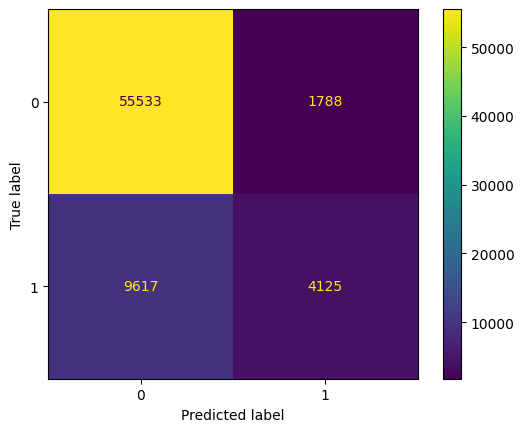

In [67]:
confusion_matrix=confusion_matrix(y_test,test_preds)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_).plot()

* The significance lies in both false negatives and false positives, potentially derailing our predictions through type-1 or type-2 errors, thereby diminishing the accuracy and reliability of our forecasts.

In [68]:
#Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

Train Accuracy : 0.84
Train F1 Score: 0.42
Train Recall Score: 0.3
Train Precision Score: 0.7


In [69]:
print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))


Test Accuracy : 0.84
Test F1 Score: 0.42
Test Recall Score: 0.3
Test Precision Score: 0.7


### Classification Report

In [70]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     57321
           1       0.70      0.30      0.42     13742

    accuracy                           0.84     71063
   macro avg       0.78      0.63      0.66     71063
weighted avg       0.82      0.84      0.81     71063



* One noticeable aspect is the high recall score, indicating that our model successfully identifies 97% of real defaulters. However, the precision for the positive class is low, meaning only 70% of predicted defaulters truly fall into that category.

* While this model effectively reduces NPAs by capturing a majority of defaulters, its low precision (false positives) might result in denying loans to deserving customers.

* The decrease in the F1 score to 42% due to low precision is significant, despite the accuracy standing at 84%. This emphasizes how the model's inability to precisely identify true positives impacts overall performance.

### Feature Importance

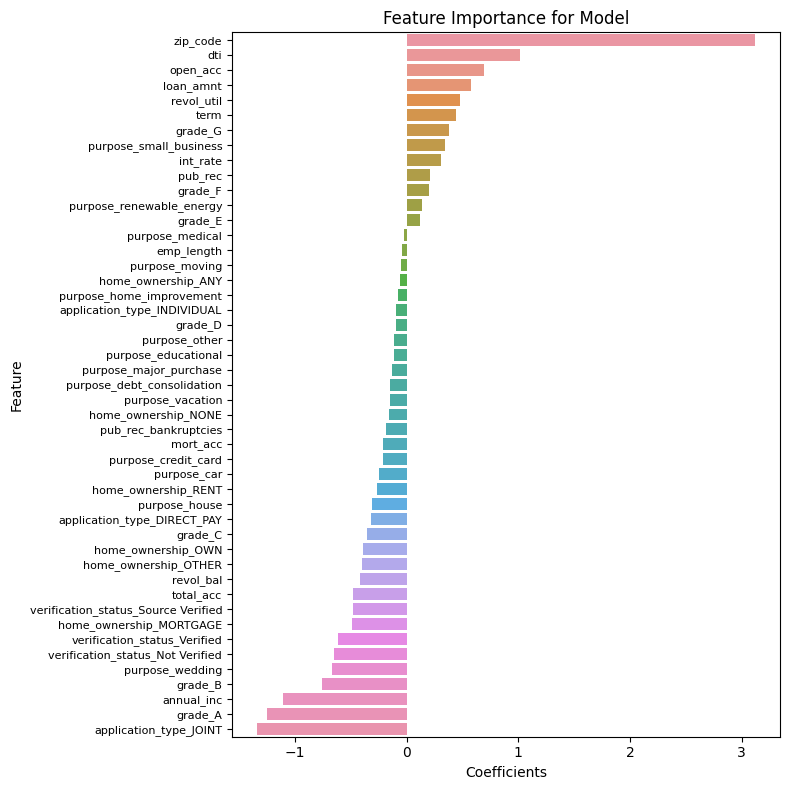

In [71]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

* The model has assigned large weightage to zip_code features followed by dti, open_acc, loan_amnt
* Similarly, large negative coefficients are assigned to a few zip codes, followed by annual income and joint application type

### ROC / AUC

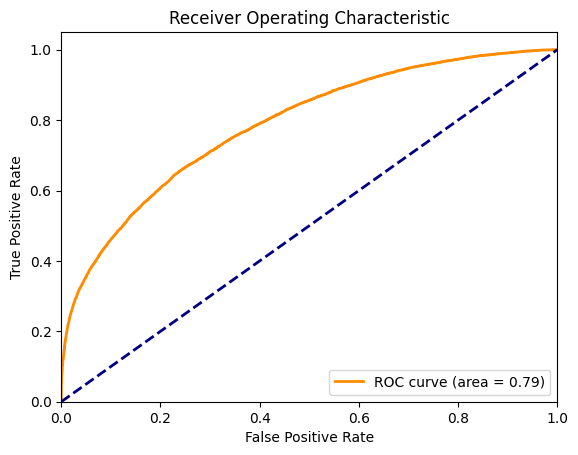

In [72]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* The ROC AUC of 0.79 signifies that the model is able to discriminate well between the positive and the negative class.
* But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.
* This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.


**Lets plot the Precision-Recall curve which is more suited for evaluation of imbalanced dat**

### Precision Recall Curve

* The Precision-Recall (PR) curve is another graphical representation commonly used to evaluate the performance of a binary classification model. It provides insights into the trade-off between precision and recall at various classification thresholds.

    * **Precision** represents the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on the accuracy of positive predictions.
    * **Recall** also known as sensitivity or true positive rate, represents the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on capturing all positive instances.

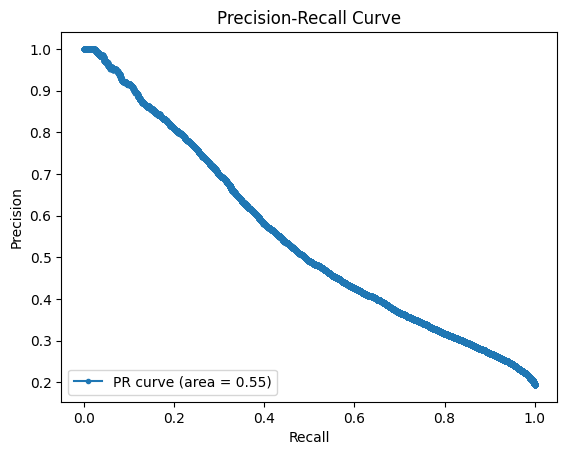

In [73]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

* As expected, the area under precision recall curve is not as high. It is a decent model as the area is more than 0.1 (random model benchmark) but there is still scope for improvement

### Validation using KFold

In [74]:
X=scaler.fit_transform(x)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(model,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.840


* Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job.

# Conclusion
Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
Ans: Balancing the imbalanced data holds the potential to mitigate false positives effectively. When it comes to evaluating metrics, directing our attention toward the macro average F1-score is essential. This deliberate choice stems from our dual aim: minimizing false positive predictions while accurately detecting defaulters.

Q2. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.
Ans: Recall score measures how effectively the model identifies genuine defaulters. Improving the recall score decreases Type 2 errors, preventing loans from being disbursed to potential defaulters.

## Insights
* Almost 80% loans are of 36 months term
* Maximum loans (30%) fall in B grade, followed by C,A & D respectively
* The type of home ownership for 50% cases is mortgage
* The target variable (loan status) is imbalanced in the favour of fully-paid loans. Defaulters are approx. 25% of fully paid instances.
* 85% of applicants don't have a public record/haven't filled for bankruptcy
* 99% applicants have applied under 'individual' application type
* 55% of loans are taken for the purpose of debt consolidation followed by 20% on credit card

* Impact of Categorical Attributes on loan_status (target variable):
    * The % of defaulters is much higher for longer (60-month) term.
    * As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters
    * Most of people have home ownership as mortgage and rent.
    * The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.
    * Individual application type has higher default rate compared to Direct pay/joint.
    * Most of the people took loan for debt consolidations.
    
* Impact of Numerical Attributes on loan_status (target variable):
    * it can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are slightly higher for defaulters while annual income is lower.
    * Most the loan disbursed to the people whose do not hold bankruptcies record have successfully paid loan.
* A Logistic Regression model (trained after up sampling the data to balance the target variable) performed well, rendering accuracy of 80%.
* The model had a precision score of 85%, recall score of 97%, and f1 score of 91% on the negative class
* The model had a precision score of 70%, recall score of 30%, and f1 score of 42% on the positive class
* The ROC AUC of 0.79 signifies that the model is able to discriminate well between the positive and the negative class.
* The area under precision recall curve is not as high. It is a decent model as the area is more than 0.1 (random model benchmark) but there is still scope for improvement.
* One noticeable aspect is the high recall score, indicating that our model successfully identifies 97% of real defaulters. However, the precision for the positive class is low, meaning only 70% of predicted defaulters truly fall into that category.
* While this model effectively reduces NPAs by capturing a majority of defaulters, its low precision (false positives) might result in denying loans to deserving customers.
* The decrease in the F1 score to 42% due to low precision is significant, despite the accuracy standing at 84%. This emphasizes how the model's inability to precisely identify true positives impacts overall performance.
* Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job.

## Recommendations

* The optimal strategy to achieve the objective of balancing the risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible: maximise the F1 score along with the area under Precision Recall Curve (precision-recall trade-off)
* More complex classifiers like random forest would give better results compared to logistic regression because they are not restricted by the linearity of decision boundary
* ROC AUC curve area of 0.79, the model is correctly classifying about 79% of the instances. This is a good performance, but there is still room for improvement.
* By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.